Starting on the Ubuntu VM on Andrew's laptop, create a file of file extensions in the endometrial data using

```bash
find ~/host_home/Box/Research_collaboration-IDIBELL-NCI-FNL -type f | rev | cut -d "." -f 1 | rev > ~/host_home/notebook/2021-10-19/studying_endometrial_files/file_extensions.txt
```

In [6]:
# This tells us that .dat files are the most prevalent in the endometrial data
import pandas as pd
df_extensions = pd.read_csv(filepath_or_buffer='./file_extensions.txt', names=['file_type'])
df_extensions.value_counts()

file_type
dat          1403
tif            61
ini            39
mrxs           39
qpdata         38
txt             1
dtype: int64

Run

```bash
find ~/host_home/Box/Research_collaboration-IDIBELL-NCI-FNL -type f -name "*.dat" | rev | cut -d "/" -f 2- | rev | sort -u > ~/host_home/notebook/2021-10-19/studying_endometrial_files/dirs_with_dat_files.txt
```

to get the list of directories containing .dat files.

Run

```bash
paste <(ls -tlr $(find ~/host_home/Box/Research_collaboration-IDIBELL-NCI-FNL -type f -name "*.dat") | awk '{printf("%s\t%s\t%s\t%s\n", $5, $6, $7, $8)}') <(ls -tlr $(find ~/host_home/Box/Research_collaboration-IDIBELL-NCI-FNL -type f -name "*.dat") | awk -v FS="/home/aweisman" '{printf("/home/aweisman%s\n", $2)}') > ~/host_home/notebook/2021-10-19/studying_endometrial_files/all_dat_files.txt
```

to get a list of all .dat file details.

In [8]:
# Get a dataframe of the files in the dataset and display by decreasing size
df = pd.read_csv(filepath_or_buffer='./all_dat_files.txt', sep='\t', names=['bytes', 'month', 'day', 'time', 'path'])
df['mb'] = df.bytes*1024**-2
df['gb'] = df.bytes*1024**-3
df['file'] = df['path'].apply(lambda x: x.split('/')[-1])
df.sort_values(['bytes'], ascending=False)

,bytes,month,day,time,path,mb,gb,file
522,1615077974,Jun,28,12:54,/home/aweisman/host_home/Box/Research_collabor...,1540.258383,1.504159e+00,Data0001.dat
114,1614244013,May,7,06:55,/home/aweisman/host_home/Box/Research_collabor...,1539.463056,1.503382e+00,Data0001.dat
968,1614192767,Aug,25,11:33,/home/aweisman/host_home/Box/Research_collabor...,1539.414184,1.503334e+00,Data0000.dat
264,1614035710,May,7,07:18,/home/aweisman/host_home/Box/Research_collabor...,1539.264402,1.503188e+00,Data0001.dat
597,1613679299,Jun,28,13:25,/home/aweisman/host_home/Box/Research_collabor...,1538.924502,1.502856e+00,Data0001.dat
...,...,...,...,...,...,...,...,...
1250,838,Aug,26,12:43,/home/aweisman/host_home/Box/Research_collabor...,0.000799,7.804483e-07,Data0020.dat
1355,791,Sep,22,07:17,/home/aweisman/host_home/Box/Research_collabor...,0.000754,7.366762e-07,Data0020.dat
1062,720,Aug,26,12:38,/home/aweisman/host_home/Box/Research_collabor...,0.000687,6.705523e-07,Data0020.dat
1285,716,Aug,26,12:45,/home/aweisman/host_home/Box/Research_collabor...,0.000683,6.668270e-07,Data0020.dat


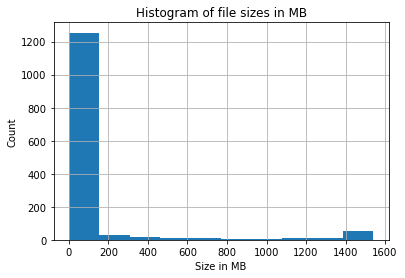

In [9]:
# Plot a histogram of the file sizes
ax = df['mb'].hist()
ax.set_xlabel('Size in MB')
ax.set_ylabel('Count')
ax.set_title('Histogram of file sizes in MB');

In [18]:
# Get the total size of the dataset in GB
df['gb'].sum()

143.22417166642845